<h2><a href="https://leetcode.com/problems/count-number-of-teams">1395. Count Number of Teams</a></h2><h3>Medium</h3><hr><p>There are <code>n</code> soldiers standing in a line. Each soldier is assigned a <strong>unique</strong> <code>rating</code> value.</p>

<p>You have to form a team of 3 soldiers amongst them under the following rules:</p>

<ul>
	<li>Choose 3 soldiers with index (<code>i</code>, <code>j</code>, <code>k</code>) with rating (<code>rating[i]</code>, <code>rating[j]</code>, <code>rating[k]</code>).</li>
	<li>A team is valid if: (<code>rating[i] &lt; rating[j] &lt; rating[k]</code>) or (<code>rating[i] &gt; rating[j] &gt; rating[k]</code>) where (<code>0 &lt;= i &lt; j &lt; k &lt; n</code>).</li>
</ul>

<p>Return the number of teams you can form given the conditions. (soldiers can be part of multiple teams).</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre>
<strong>Input:</strong> rating = [2,5,3,4,1]
<strong>Output:</strong> 3
<strong>Explanation:</strong> We can form three teams given the conditions. (2,3,4), (5,4,1), (5,3,1). 
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> rating = [2,1,3]
<strong>Output:</strong> 0
<strong>Explanation:</strong> We can&#39;t form any team given the conditions.
</pre>

<p><strong class="example">Example 3:</strong></p>

<pre>
<strong>Input:</strong> rating = [1,2,3,4]
<strong>Output:</strong> 4
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>n == rating.length</code></li>
	<li><code>3 &lt;= n &lt;= 1000</code></li>
	<li><code>1 &lt;= rating[i] &lt;= 10<sup>5</sup></code></li>
	<li>All the integers in <code>rating</code> are <strong>unique</strong>.</li>
</ul>


## TLE

In [2]:
# Backtracking Solution
from typing import List

class Solution:
    def numTeams(self, rating: List[int]) -> int:
        count = 0
        
        def backtrack(index, current):
            nonlocal count

            if len(current) == 3:
                if (current[0] < current[1] < current[2]) or (current[0] > current[1] > current[2]):
                    count += 1
                return 

            for i in range(index, len(rating)):
                current.append(rating[i])
                backtrack(i + 1, current)
                current.pop()

            return count


        backtrack(0, [])
        return count 

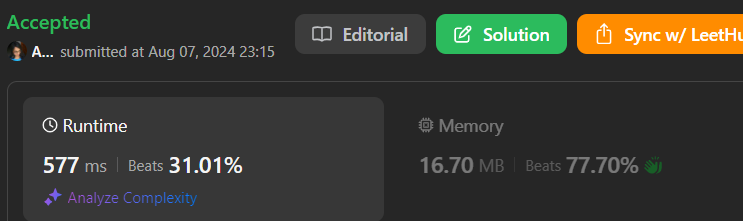

In [3]:
class Solution:
    def numTeams(self, rating: List[int]) -> int:
        n = len(rating)
        count = 0

        for j in range(n):
            left_less = right_less = left_more = right_more = 0
            
            for i in range(j):
                if rating[i] < rating[j]:
                    left_less += 1
                if rating[i] > rating[j]:
                    left_more += 1

            for k in range(j + 1, n):
                if rating[k] < rating[j]:
                    right_less += 1
                if rating[k] > rating[j]:
                    right_more += 1

            count += left_less * right_more + left_more*right_less
        return count